# Project Overview

## Dataset

Dataset yang digunakan dalam project ini adalah dataset prediksi penggunaan energi perangkat listrik rumah yang diperoleh dari:
https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

## Objective

Tujuan dari project ini adalah membuat model machine learning regresi yang dapat memprediksi penggunaan listrik berdasarkan data eksternal seperti temperatur, kelembapan udara, kecepatan angin, tekanan udara.

Harapannya, dari project ini dapat diperoleh insight terkait variabel apa saja yang mempengaruhi pemakaian listrik di rumah dan model yang dibuat dapat memprediksi pemakaian listrik secara akurat. Insight yang diperoleh atau model machine learning yang dibuat dapat diaplikasikan menggunakan data yang tersedia di Indonesia untuk memprediksi beban tenaga listrik, memberi prediksi kepada pelanggan kapan token listrik akan habis, dan mendeteksi anomali penggunaan listrik.

# 1. Data Preparation

In [1]:
# Import basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Tidak ada missing value

### Keterangan kolom:

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

Variabel:
- T1 s.d. T9
- RH_1 s.d. RH9
- rv1 dan rv2

akan di drop karena tidak relevan.

Project ini hanya akan menganalisis data dari sisi eksternal.

In [5]:
drop = ['T1','T2','T3','T4','T5','T6','T7','T8','T9',
        'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9',
        'rv1', 'rv2']

df.drop(drop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T_out        19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   RH_out       19735 non-null  float64
 6   Windspeed    19735 non-null  float64
 7   Visibility   19735 non-null  float64
 8   Tdewpoint    19735 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.4+ MB


Tidak ada missing value

In [6]:
df.duplicated().sum()

0

Tidak ada duplicated value

Kolom date perlu diubah ke tipe data datetime.

Selebihnya tipe data dengan keterangan kolom sudah cocok, tidak perlu encoding

In [7]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')

df['date'].head()

0   2016-01-11 17:00:00
1   2016-01-11 17:10:00
2   2016-01-11 17:20:00
3   2016-01-11 17:30:00
4   2016-01-11 17:40:00
Name: date, dtype: datetime64[ns]

In [8]:
df.head()

date  Appliances  lights     T_out  Press_mm_hg  RH_out  \
0 2016-01-11 17:00:00          60      30  6.600000        733.5    92.0   
1 2016-01-11 17:10:00          60      30  6.483333        733.6    92.0   
2 2016-01-11 17:20:00          50      30  6.366667        733.7    92.0   
3 2016-01-11 17:30:00          50      40  6.250000        733.8    92.0   
4 2016-01-11 17:40:00          60      40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint  
0   7.000000   63.000000        5.3  
1   6.666667   59.166667        5.2  
2   6.333333   55.333333        5.1  
3   6.000000   51.500000        5.0  
4   5.666667   47.666667        4.9

# 2. Exploratory Data Analysis

## Statistical Summary

In [9]:
df.describe()

Appliances        lights         T_out   Press_mm_hg        RH_out  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875      7.411665    755.522602     79.750418   
std      102.524891      7.935988      5.317409      7.399441     14.901088   
min       10.000000      0.000000     -5.000000    729.300000     24.000000   
25%       50.000000      0.000000      3.666667    750.933333     70.333333   
50%       60.000000      0.000000      6.916667    756.100000     83.666667   
75%      100.000000      0.000000     10.408333    760.933333     91.666667   
max     1080.000000     70.000000     26.100000    772.300000    100.000000   

          Windspeed    Visibility     Tdewpoint  
count  19735.000000  19735.000000  19735.000000  
mean       4.039752     38.330834      3.760707  
std        2.451221     11.794719      4.194648  
min        0.000000      1.000000     -6.600000  
25%        2.000000     29.000000      0.900000  
50%        3.666667     40.000000      3.433333  
75%        5.500000     40.000000      6.566667  
max       14.000000     66.000000     15.500000

- rata-rata Appliances sangat jauh dengan max dan lebih dekat dengan Q3
- Q1, Q2, dan Q3 dari 'lights' adalah 0. Namun rata-rata 3,8 dan max 70. Artinya sebagian besar data ada di sebelah kiri.
- press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint tampak terdistribusi dengan baik. Rata-rata berada di dekat median.
- T_out memiliki nilai minimum negatif. Rata-rata di dekat median.

### Outlier check:

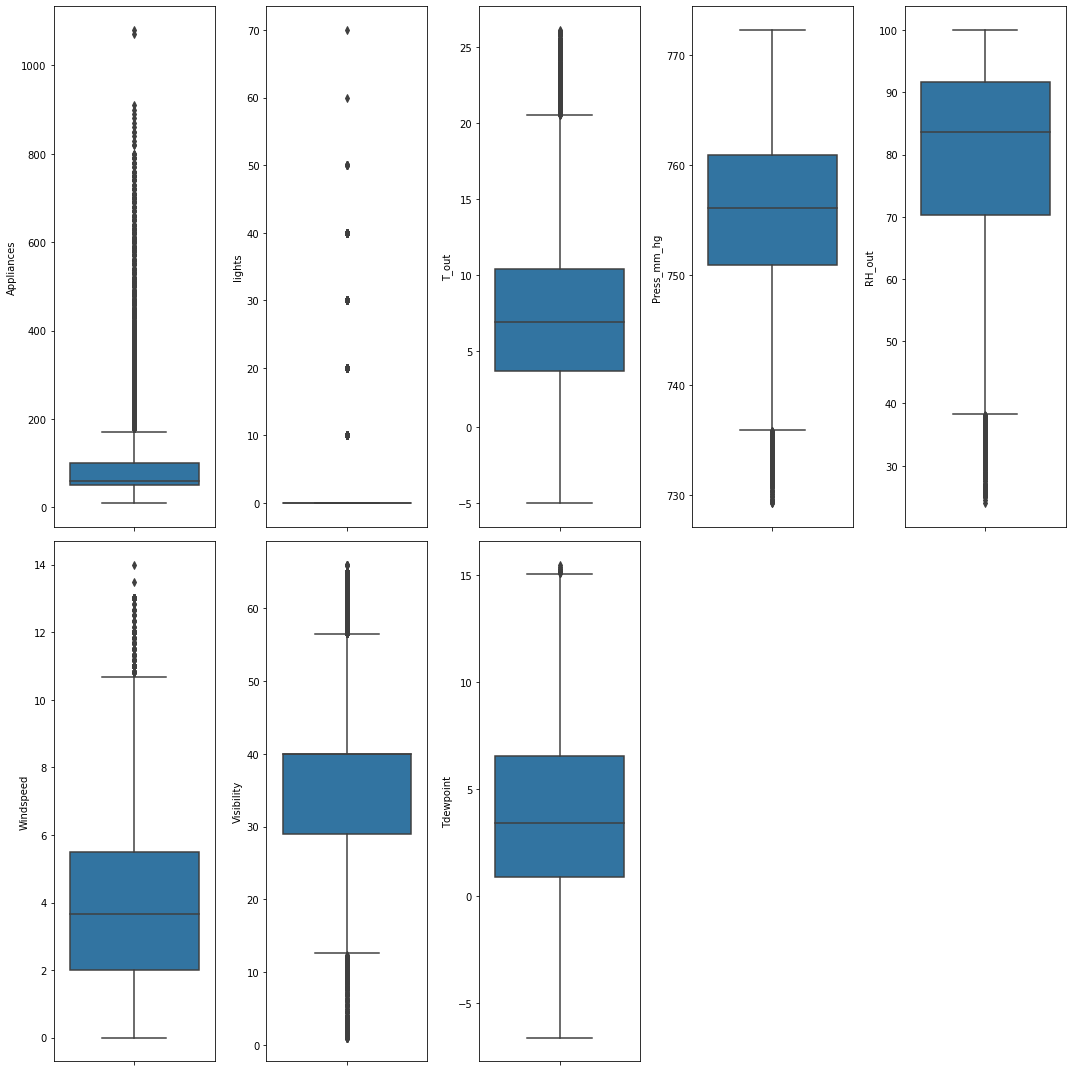

In [10]:
# Use boxplot to detect outliers

features = ['Appliances', 'lights', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint']

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

for i in range(0, len(features)):
    plt.subplot(2, len(features) //2 + 1, i+1)
    sns.boxplot(y=df[features[i]])
    plt.tight_layout()

Terlalu banyak outlier jika dihitung secara statistik.
Sementara di dalamnya mengandung informasi

### Data Distribution Check

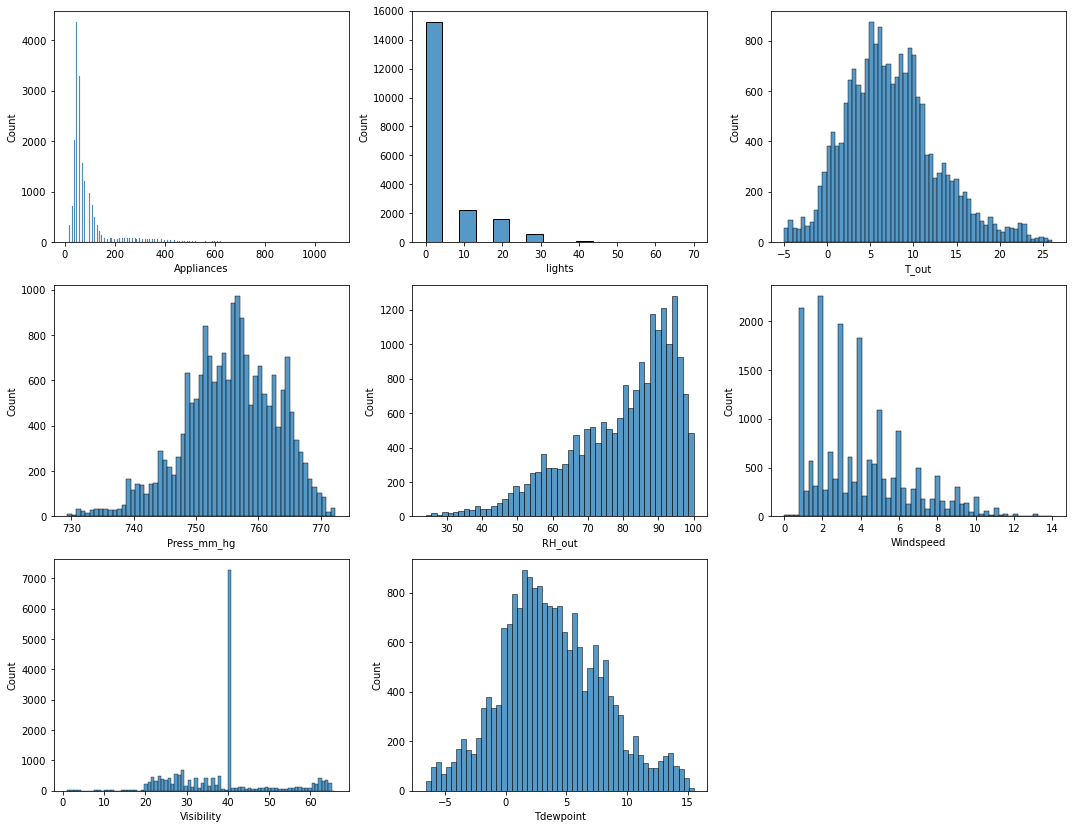

In [11]:
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
    plt.subplot(4, len(features) //4 + 1, i+1)
    sns.histplot(x=df[features[i]])
    plt.tight_layout()

Data yang terdistribusi normal:

- T_out
- Press_mm_hg
- Tdewpoint

Sebagian besar nilai Visibility adalah 40 km.

Sebagian besar nilai lights adalah 0 (nol).

Untuk variabel lainnya, sebagian besar nilai berada di kiri (positive skew)

### Correlation Check

<AxesSubplot:>

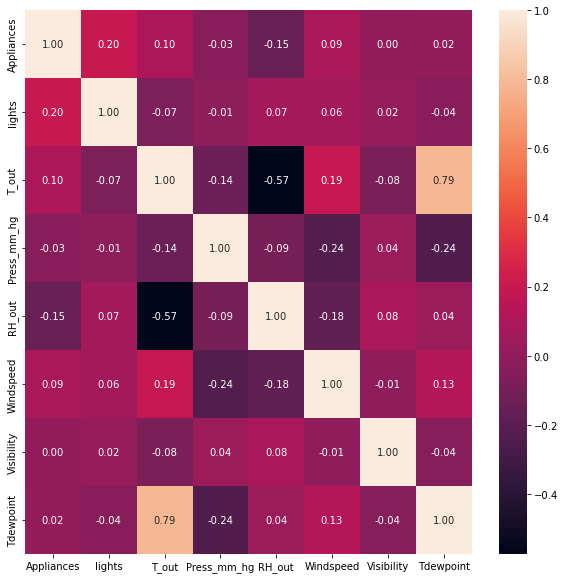

In [12]:
# correlation heatmap
plt.figure(figsize=(10,10))

correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

- T_out dengan Tdewpoint memiliki korelasi positif yang tinggi

- T_out dengan RH_out memiliki korelasi negatif yang cukup tinggi

- Data yang paling berkorelasi dengan target (Appliances) adalah lights, namun hanya memiliki nilai 0.2 sehingga tidak dapat dibilang berkorelasi

### Pairplot

In [13]:
# 'Appliances' Binning

def appli_cat(x):
    if x <= 200:
        return 'Normal'
    elif x > 200 and x <= 600:
        return 'Agak Tinggi'
    elif x > 600:
        return 'Tinggi'

df['usage_cat'] = df['Appliances'].apply(appli_cat)
df

date  Appliances  lights      T_out  Press_mm_hg  \
0     2016-01-11 17:00:00          60      30   6.600000        733.5   
1     2016-01-11 17:10:00          60      30   6.483333        733.6   
2     2016-01-11 17:20:00          50      30   6.366667        733.7   
3     2016-01-11 17:30:00          50      40   6.250000        733.8   
4     2016-01-11 17:40:00          60      40   6.133333        733.9   
...                   ...         ...     ...        ...          ...   
19730 2016-05-27 17:20:00         100       0  22.733333        755.2   
19731 2016-05-27 17:30:00          90       0  22.600000        755.2   
19732 2016-05-27 17:40:00         270      10  22.466667        755.2   
19733 2016-05-27 17:50:00         420      10  22.333333        755.2   
19734 2016-05-27 18:00:00         430      10  22.200000        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint    usage_cat  
0      92.000000   7.000000   63.000000   5.300000       Normal  
1      92.000000   6.666667   59.166667   5.200000       Normal  
2      92.000000   6.333333   55.333333   5.100000       Normal  
3      92.000000   6.000000   51.500000   5.000000       Normal  
4      92.000000   5.666667   47.666667   4.900000       Normal  
...          ...        ...         ...        ...          ...  
19730  55.666667   3.333333   23.666667  13.333333       Normal  
19731  56.000000   3.500000   24.500000  13.300000       Normal  
19732  56.333333   3.666667   25.333333  13.266667  Agak Tinggi  
19733  56.666667   3.833333   26.166667  13.233333  Agak Tinggi  
19734  57.000000   4.000000   27.000000  13.200000  Agak Tinggi  

[19735 rows x 10 columns]

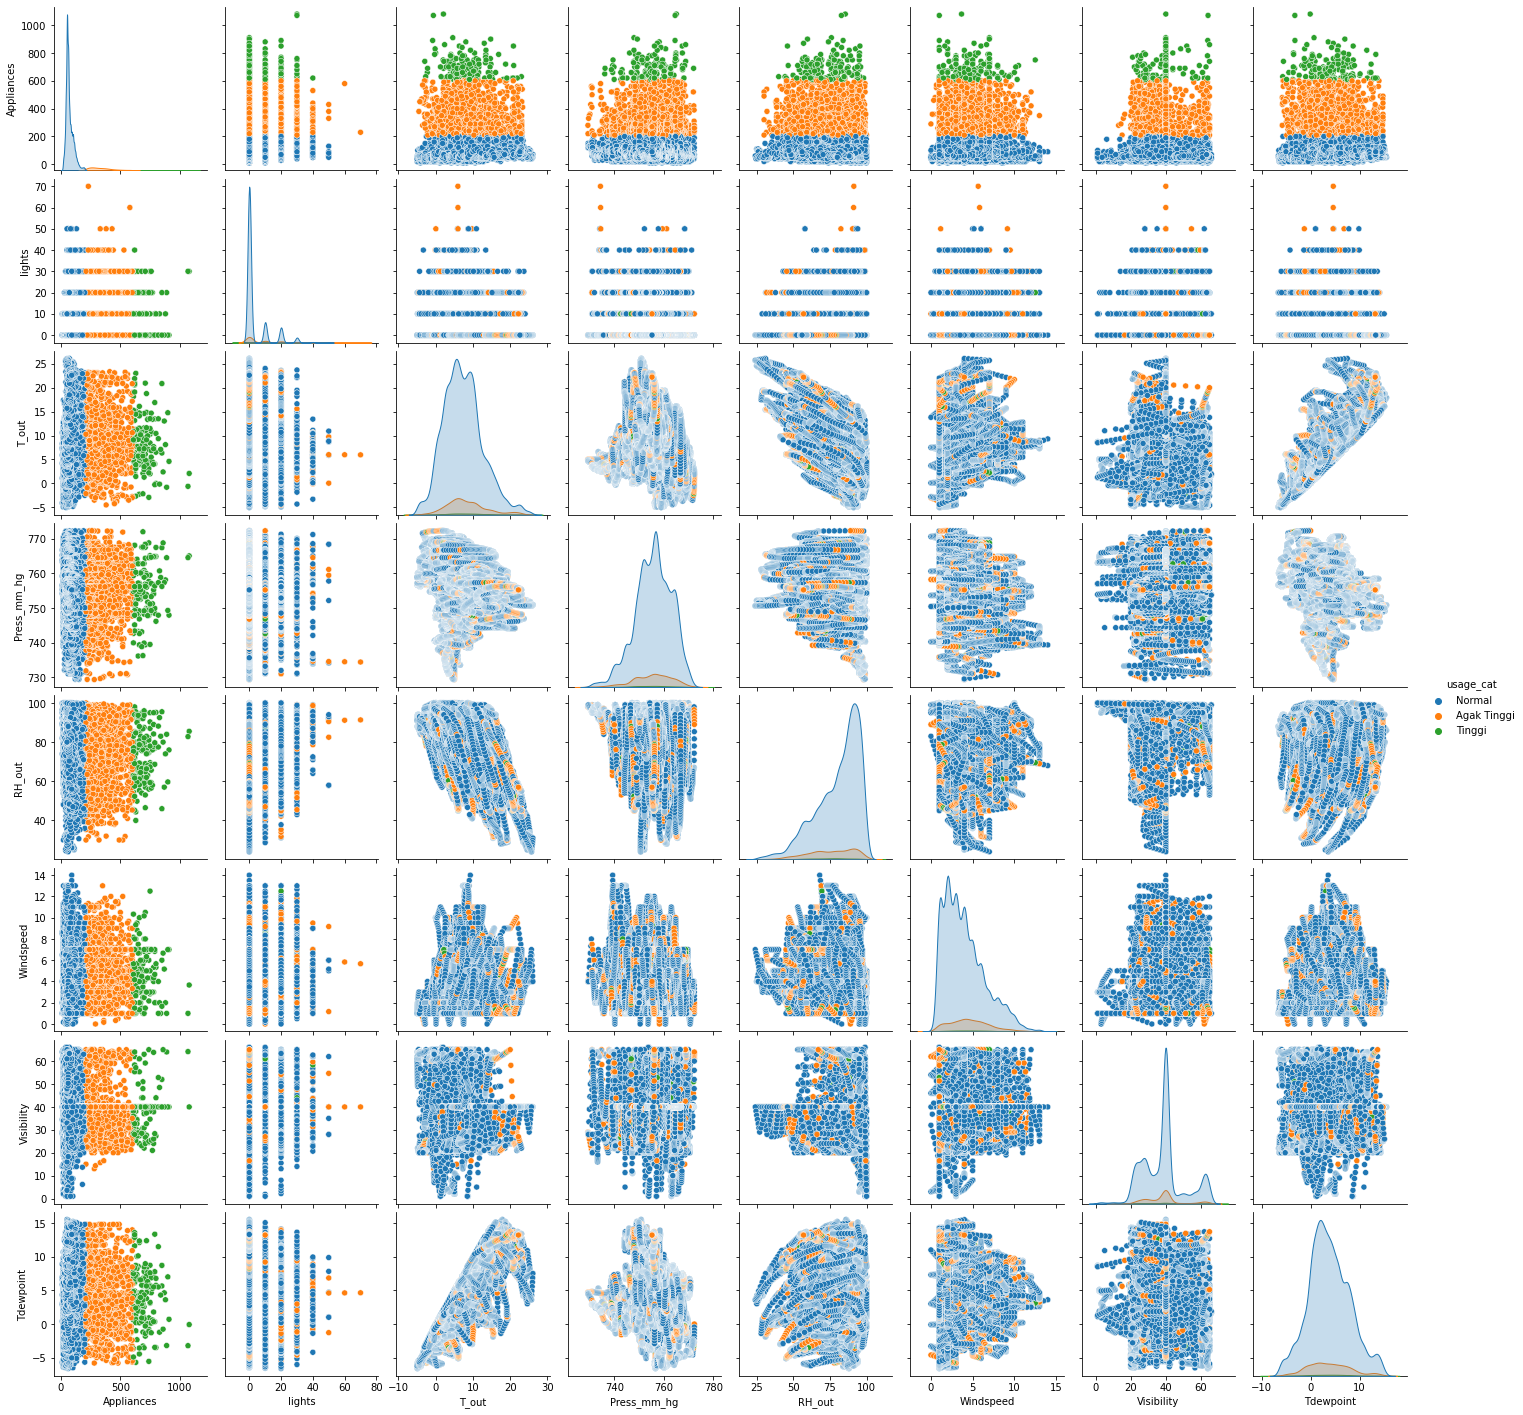

In [14]:
sns.pairplot(df, hue='usage_cat')

Menggunakan timeframe per jam dengan nilai rata-rata untuk visualisasi yang lebih mudah

In [15]:
# group by data dalam siklus per jam

df_hourly = df.groupby([df['date'].dt.date, df['date'].dt.hour]).mean()

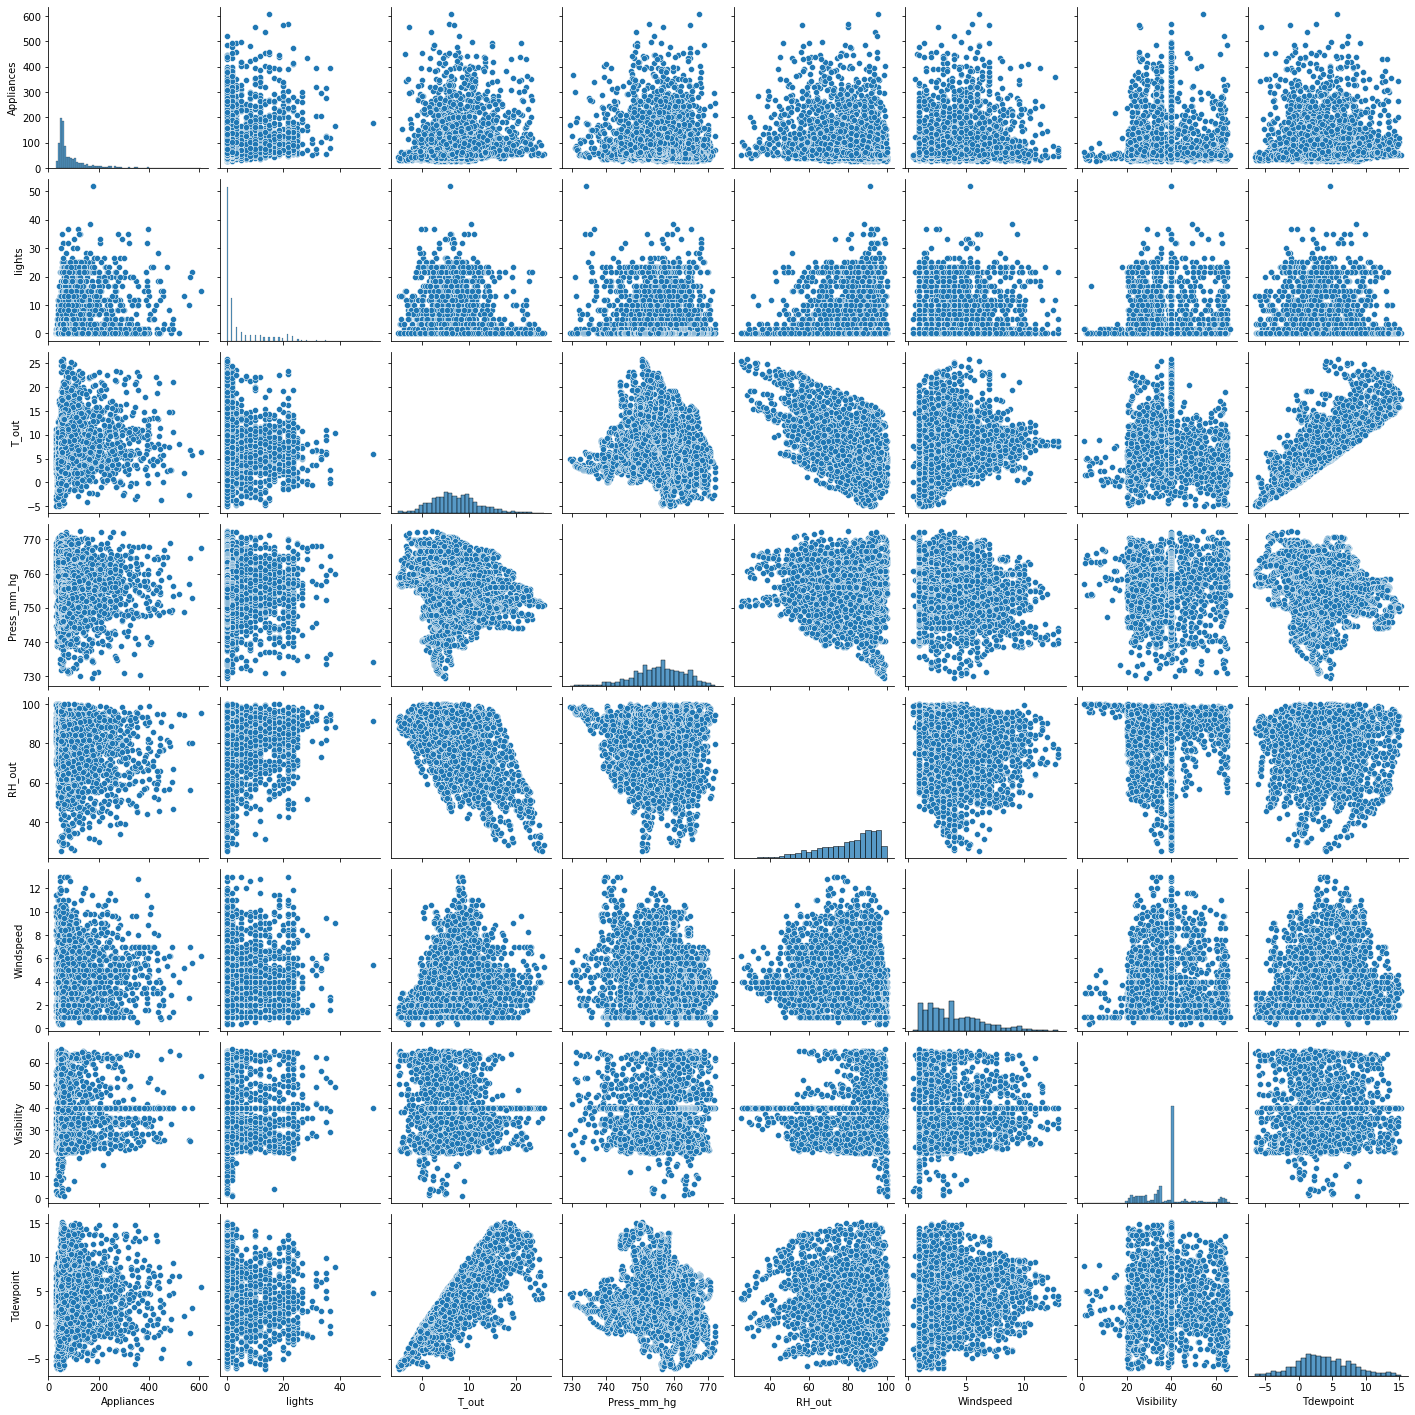

In [16]:
sns.pairplot(df_hourly)

Tidak ditemukan insight yang berarti dari pairplot

### Time Series Line Plot

In [17]:
# group by data harian

df_daily = df.groupby([df['date'].dt.date]).mean()

df_daily

Appliances     lights      T_out  Press_mm_hg     RH_out  \
date                                                                   
2016-01-11  136.666667  30.000000   5.922619   735.173810  89.285714   
2016-01-12   85.694444   4.236111   5.566319   742.628125  87.500000   
2016-01-13   97.013889   5.416667   4.856944   754.790625  83.406250   
2016-01-14  151.388889   5.000000   3.431944   749.767361  86.420139   
2016-01-15  125.347222   5.972222   2.665278   754.579861  88.385417   
...                ...        ...        ...          ...        ...   
2016-05-23   83.055556   2.013889  12.570486   755.849653  84.225694   
2016-05-24   96.180556   4.236111  11.568750   759.007292  76.680556   
2016-05-25   83.888889   2.569444  11.563542   756.887500  74.774306   
2016-05-26  147.013889   3.125000  14.923611   756.619792  74.336806   
2016-05-27  136.330275   0.642202  17.195413   755.784862  74.275229   

            Windspeed  Visibility  Tdewpoint  
date                                          
2016-01-11   6.083333   40.845238   4.228571  
2016-01-12   5.784722   37.229167   3.596528  
2016-01-13   5.614583   31.559028   2.169792  
2016-01-14   6.277778   35.149306   1.316667  
2016-01-15   7.770833   40.208333   0.849653  
...               ...         ...        ...  
2016-05-23   4.208333   46.017361   9.851736  
2016-05-24   4.114583   33.975694   7.469097  
2016-05-25   1.350694   30.739583   6.819097  
2016-05-26   1.850694   39.329861   9.636458  
2016-05-27   2.041284   46.596330  12.246330  

[138 rows x 8 columns]

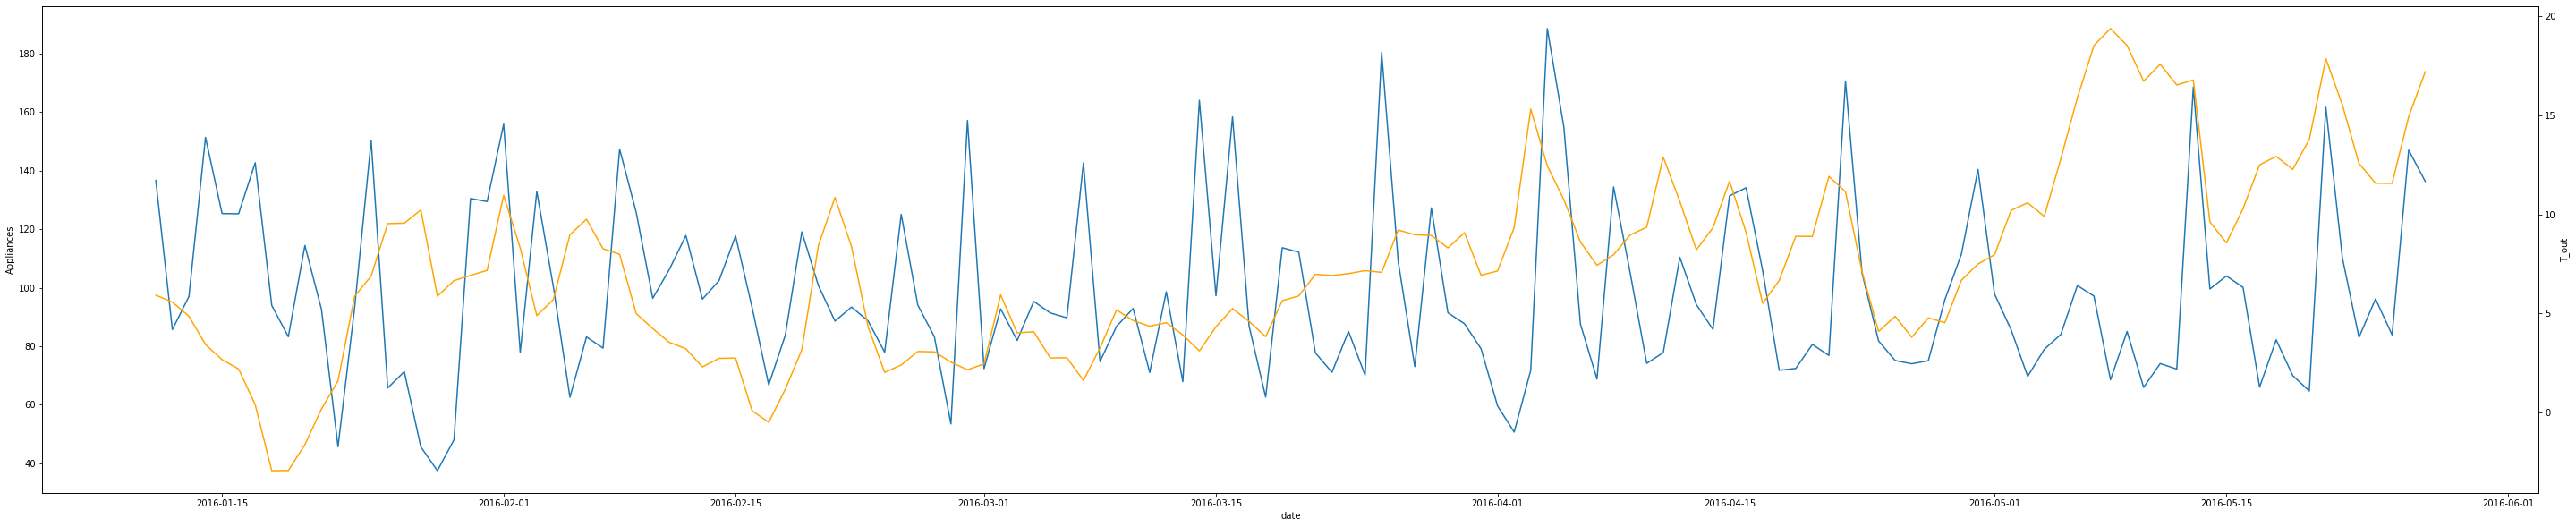

In [18]:
# daily line plot
# appliances dan t_out

plt.figure(figsize=(50,10))

ax = sns.lineplot(data=df_daily, x='date', y='Appliances', markers=True)
ax2 = ax.twinx()
sns.lineplot(data=df_daily, x='date', y='T_out', markers=True, ax=ax2, color='orange')
plt.show()

Tidak tampak korelasi antara rata-rata penggunaan listrik harian dengan rata-rata suhu luar ruangan harian.

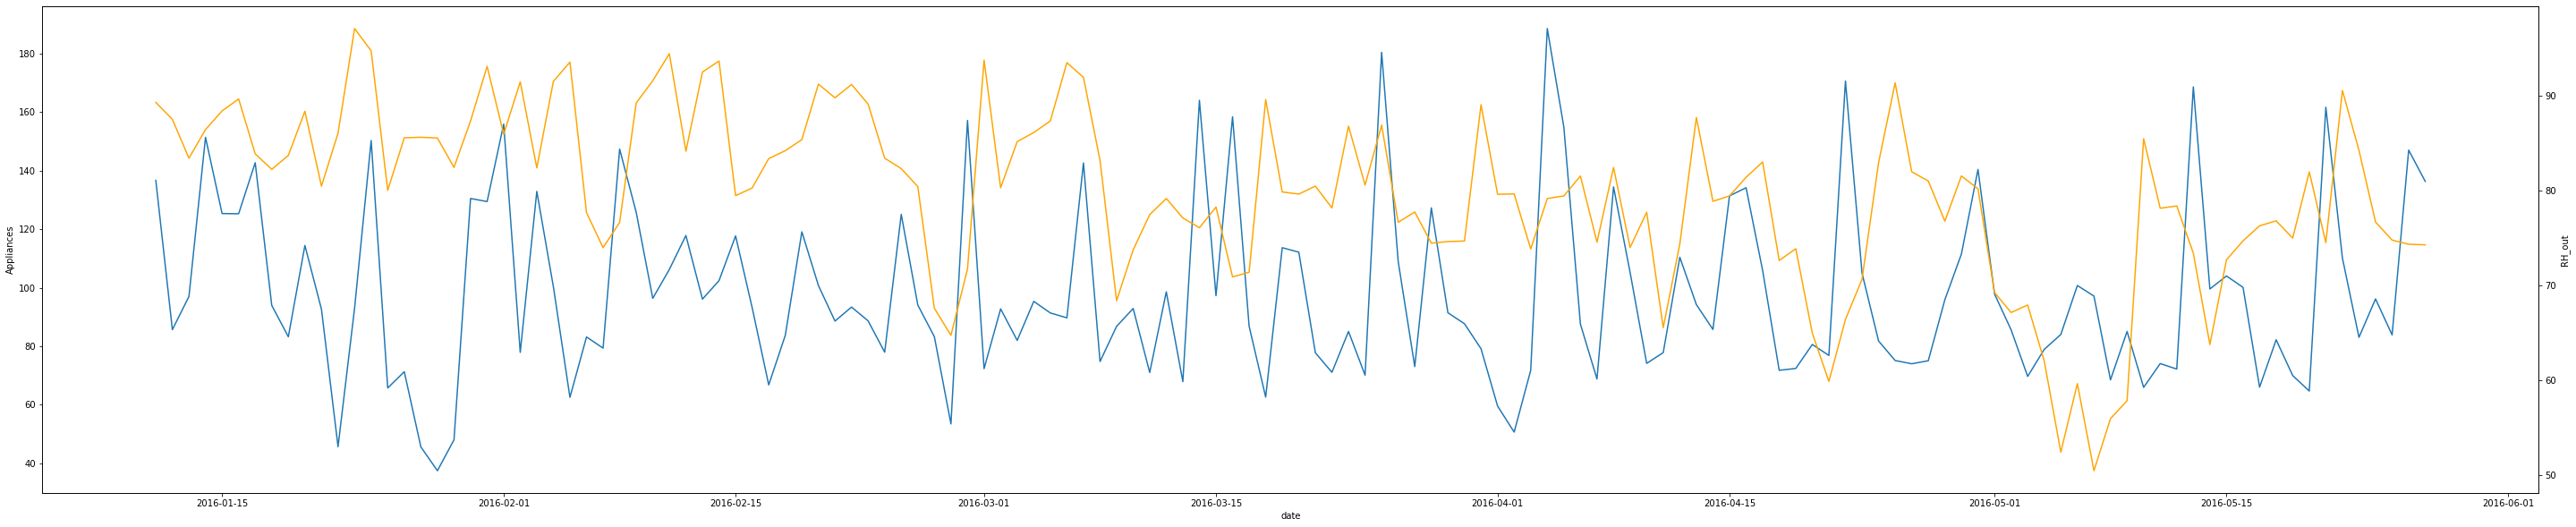

In [19]:
# daily line plot
# appliances dan RH_out

plt.figure(figsize=(50,10))

ax = sns.lineplot(data=df_daily, x='date', y='Appliances', markers=True)
ax2 = ax.twinx()
sns.lineplot(data=df_daily, x='date', y='RH_out', markers=True, ax=ax2, color='orange')
plt.show()

Tidak tampak korelasi antara penggunaan listrik harian dengan rata-rata kelembapan luar ruangan harian.

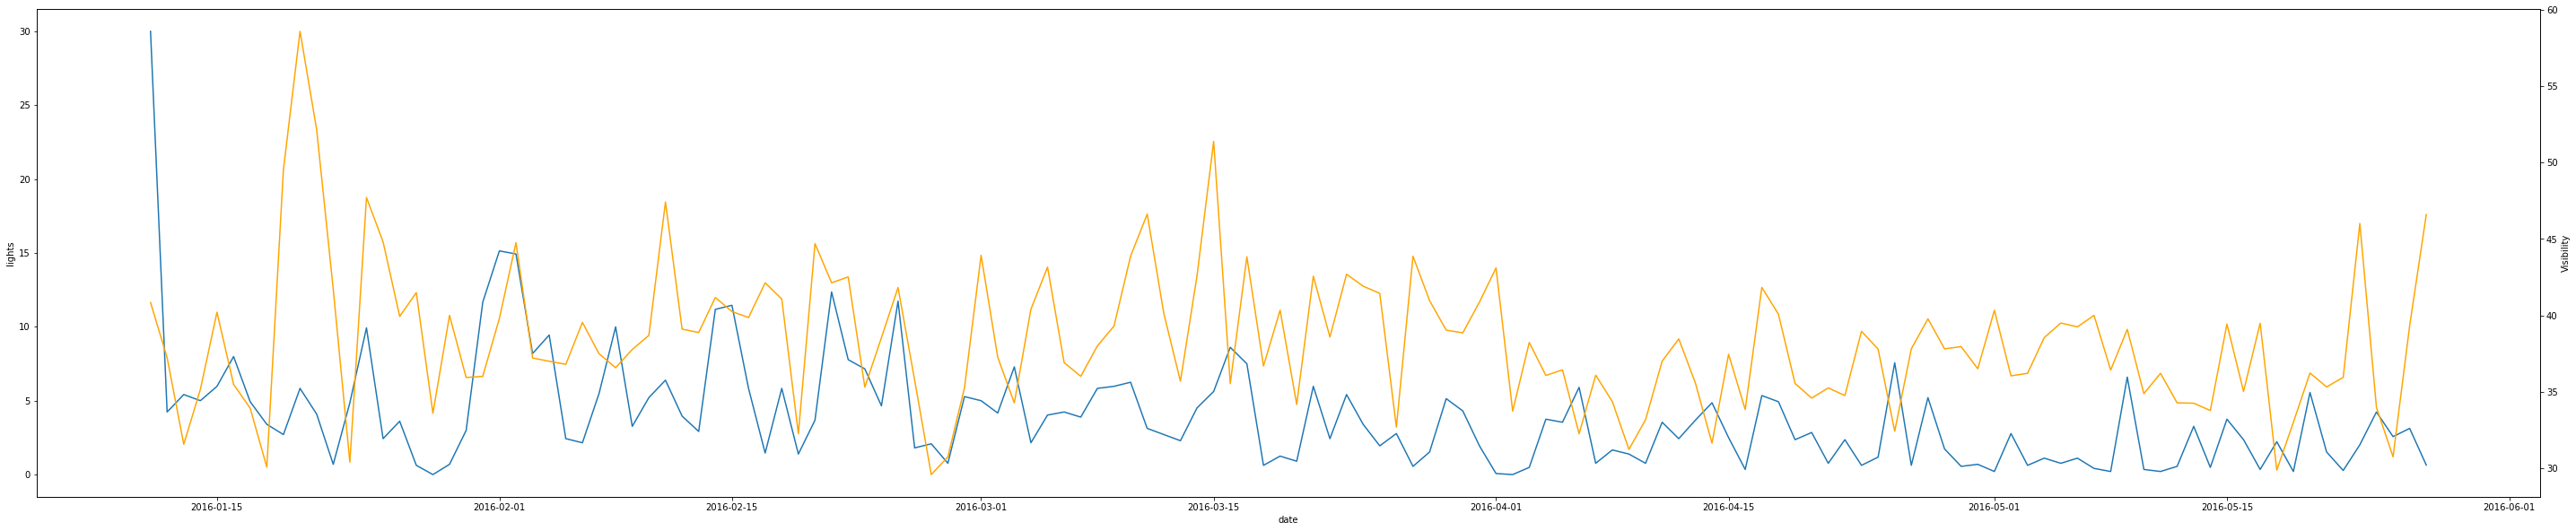

In [20]:
# daily line plot
# appliances dan t_out

plt.figure(figsize=(50,10))

ax = sns.lineplot(data=df_daily, x='date', y='lights', markers=True)
ax2 = ax.twinx()
sns.lineplot(data=df_daily, x='date', y='Visibility', markers=True, ax=ax2, color='orange')
plt.show()

Tidak tampak korelasi antara jumlah penggunaan listrik untuk lampu harian dengan rata-rata visibility harian

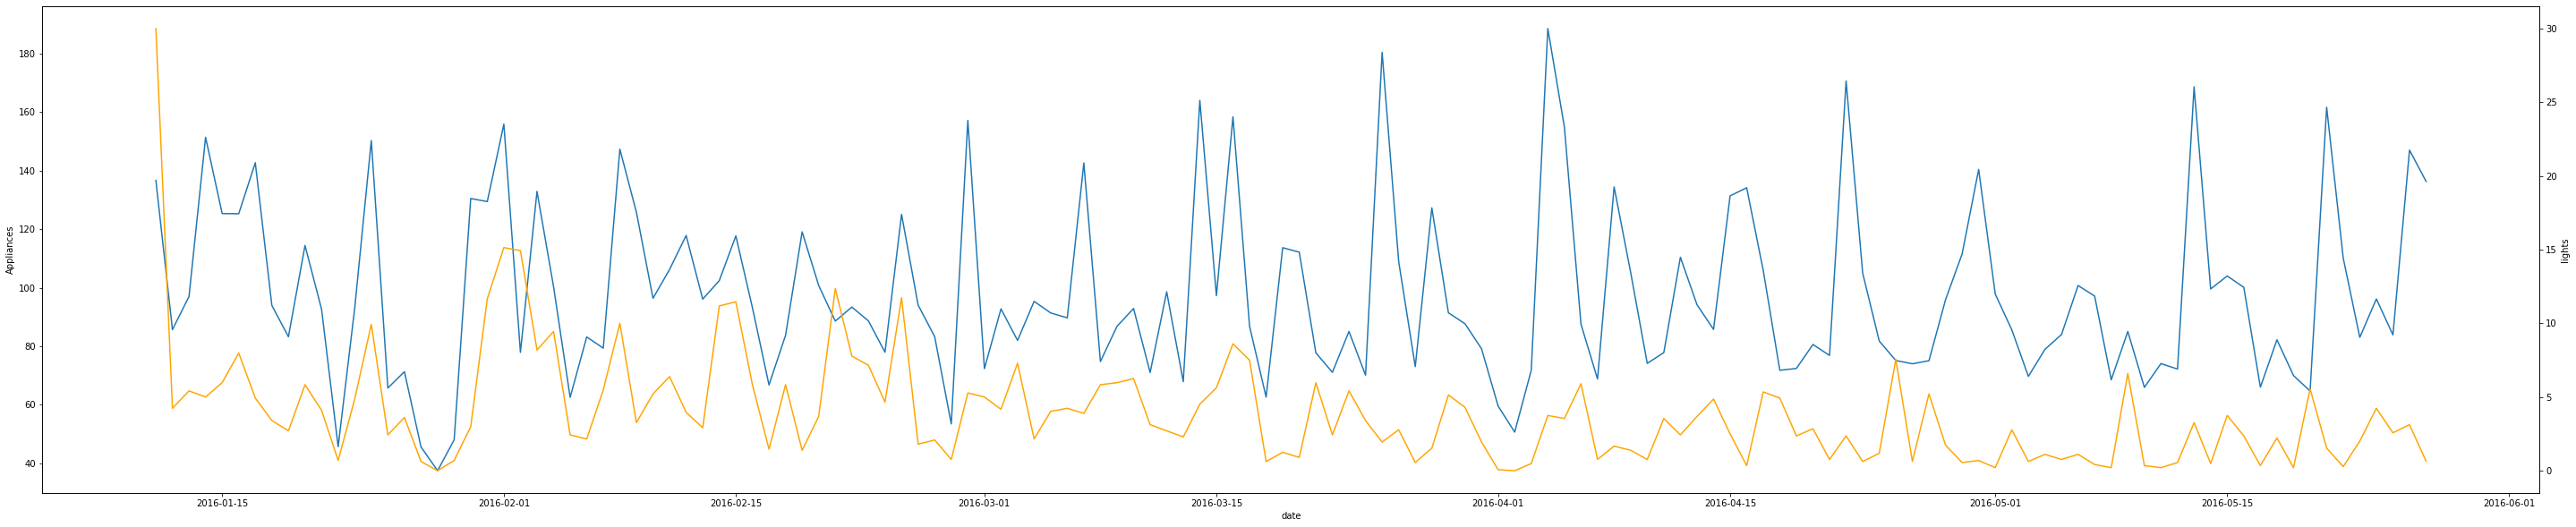

In [21]:
# daily line plot
# appliances dan lights

plt.figure(figsize=(50,10))

ax = sns.lineplot(data=df_daily, x='date', y='Appliances', markers=True)
ax2 = ax.twinx()
sns.lineplot(data=df_daily, x='date', y='lights', markers=True, ax=ax2, color='orange')
plt.show()

Tampak bahwa penggunaan listrik appliances yang meningkat disertai juga dengan penggunaan listrik untuk lampu (lights) yang meningkat.

### Time Series Line Plot (Hourly Data)

In [22]:
df_hourly['hours'] = np.arange(0,len(df_hourly))
df_hourly.set_index('hours', drop=True, inplace=True)
df_hourly

Appliances     lights      T_out  Press_mm_hg     RH_out  Windspeed  \
hours                                                                        
0       55.000000  35.000000   6.308333   733.750000  92.000000   6.166667   
1      176.666667  51.666667   5.941667   734.266667  91.583333   5.416667   
2      173.333333  25.000000   6.000000   734.791667  89.750000   6.000000   
3      125.000000  35.000000   6.000000   735.283333  87.583333   6.000000   
4      103.333333  23.333333   5.833333   735.566667  87.416667   6.000000   
...           ...        ...        ...          ...        ...        ...   
3285   101.666667   1.666667  21.916667   755.800000  59.000000   2.000000   
3286    76.666667   0.000000  22.216667   755.675000  57.333333   2.000000   
3287   135.000000   0.000000  22.883333   755.375000  55.000000   2.416667   
3288   180.000000   3.333333  22.666667   755.200000  55.833333   3.416667   
3289   430.000000  10.000000  22.200000   755.200000  57.000000   4.000000   

       Visibility  Tdewpoint  
hours                         
0       53.416667   5.050000  
1       40.000000   4.658333  
2       40.000000   4.391667  
3       40.000000   4.016667  
4       40.000000   3.816667  
...           ...        ...  
3285    21.583333  13.475000  
3286    21.833333  13.258333  
3287    22.583333  13.283333  
3288    24.083333  13.316667  
3289    27.000000  13.200000  

[3290 rows x 8 columns]

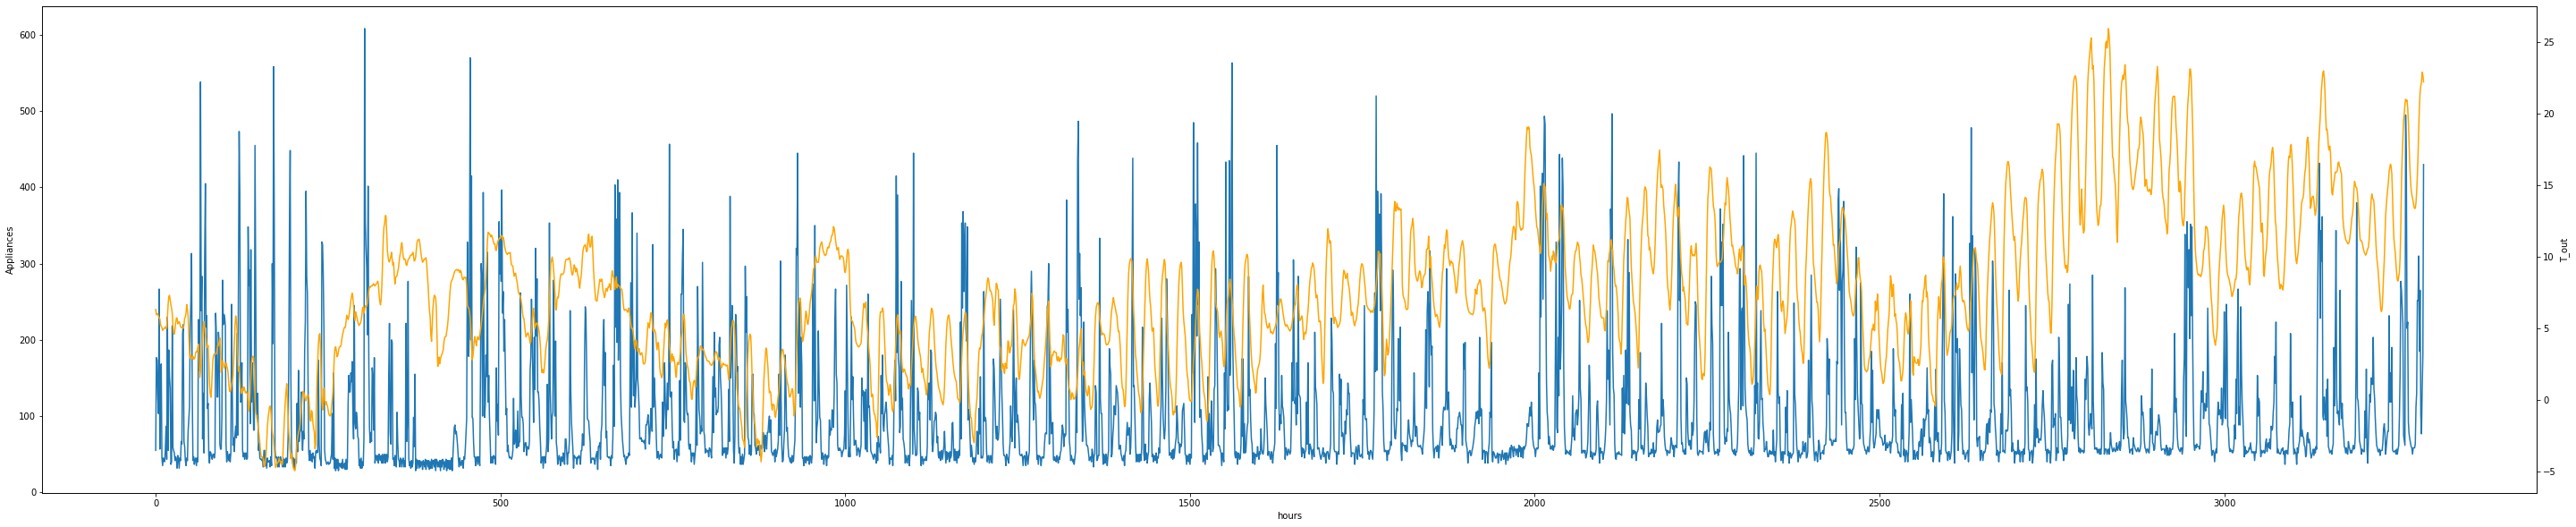

In [23]:
# daily line plot
# appliances dan t_out

plt.figure(figsize=(50,10))

ax = sns.lineplot(data=df_hourly, x='hours', y='Appliances', markers=True)
ax2 = ax.twinx()
sns.lineplot(data=df_hourly, x='hours', y='T_out', markers=True, ax=ax2, color='orange')
plt.show()

Tidak tampak korelasi antara rata-rata penggunaan listrik per jam dengan rata-rata suhu luar ruangan per jam.

### Deep Dive Question

#### Bagaimana kondisi pada 10 hari penggunaan listrik terbesar dan terendah?

In [24]:
# 10 hari Penggunaan appliances terbesar

cols = ['Appliances', 'lights', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

df_daily.sort_values('Appliances', ascending=False)[cols].head(10)

Appliances     lights      T_out  Press_mm_hg     RH_out  \
date                                                                   
2016-04-04  188.541667   3.750000  12.443403   748.996875  79.152778   
2016-03-25  180.416667   1.944444   7.070833   755.781597  86.892361   
2016-04-22  170.625000   2.361111  11.141667   758.835417  66.406250   
2016-05-13  168.611111   3.263889  16.774653   747.851736  73.395833   
2016-03-14  164.027778   4.513889   3.107292   767.917361  76.076389   
2016-05-21  161.666667   1.527778  17.851042   755.208333  74.500000   
2016-03-16  158.402778   8.611111   5.243750   764.693403  70.895833   
2016-02-29  157.152778   5.277778   2.153125   762.346181  71.715278   
2016-02-01  155.902778  15.138889  10.956597   759.171181  85.934028   
2016-04-05  154.861111   3.541667  10.737153   750.667014  79.430556   

            Windspeed  Visibility  Tdewpoint  
date                                          
2016-04-04   4.222222   36.065972   8.707986  
2016-03-25   4.006944   41.440972   4.836806  
2016-04-22   4.350694   34.750000   4.963194  
2016-05-13   4.604167   34.250000  11.336458  
2016-03-14   4.166667   42.604167  -0.944792  
2016-05-21   4.708333   35.315972  12.850347  
2016-03-16   5.625000   35.531250  -0.058333  
2016-02-29   4.621528   35.256944  -2.825000  
2016-02-01   8.309028   39.798611   8.622569  
2016-04-05   2.784722   36.434028   7.147569

In [25]:
# 10 hari Penggunaan appliances terkecil

cols = ['Appliances', 'lights', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

df_daily.sort_values('Appliances', ascending=True)[cols].head(10)

Appliances    lights      T_out  Press_mm_hg     RH_out  \
date                                                                  
2016-01-28   37.500000  0.000000   5.869444   763.188194  85.534722   
2016-01-27   45.625000  0.625000  10.219097   756.694097  85.611111   
2016-01-22   45.694444  0.694444   1.598958   762.484375  86.041667   
2016-01-29   48.055556  0.694444   6.651736   763.313194  82.430556   
2016-04-02   50.694444  0.000000   9.333681   756.535069  79.638889   
2016-02-28   53.472222  0.763889   2.543750   757.101389  64.739583   
2016-04-01   59.583333  0.069444   7.143056   759.649653  79.600694   
2016-02-05   62.569444  2.430556   8.972222   762.283681  93.527778   
2016-03-18   62.638889  0.625000   3.826389   763.001389  89.583333   
2016-05-20   64.722222  5.555556  13.777431   757.984375  81.961806   

            Windspeed  Visibility  Tdewpoint  
date                                          
2016-01-28   3.065972   33.593750   3.535069  
2016-01-27   9.347222   41.489583   7.846875  
2016-01-22   4.517361   41.704861  -0.584028  
2016-01-29   8.319444   40.000000   3.842014  
2016-04-02   2.253472   33.732639   5.893056  
2016-02-28   6.392361   30.729167  -3.704167  
2016-04-01   2.031250   43.107639   3.529167  
2016-02-05   4.552083   36.795139   7.958681  
2016-03-18   2.784722   36.684028   2.172222  
2016-05-20   3.857639   36.225694  10.545486

In [26]:
# statistik 10 hari Penggunaan appliances terbesar

df_daily.sort_values('Appliances', ascending=False)[cols].head(10).describe()

Appliances     lights      T_out  Press_mm_hg     RH_out  Windspeed  \
count   10.000000  10.000000  10.000000    10.000000  10.000000  10.000000   
mean   166.020833   4.993056   9.747951   757.146910  76.439931   4.739931   
std     11.199497   4.098915   5.332462     6.727785   6.519975   1.440043   
min    154.861111   1.527778   2.153125   747.851736  66.406250   2.784722   
25%    157.465278   2.586806   5.700521   751.802344  72.135417   4.180556   
50%    162.847222   3.645833  10.846875   757.308507  75.288194   4.477431   
75%    170.121528   5.086806  12.117969   761.552431  79.361111   4.686632   
max    188.541667  15.138889  17.851042   767.917361  86.892361   8.309028   

       Visibility  Tdewpoint  
count   10.000000  10.000000  
mean    37.144792   5.463681  
std      2.992595   5.305121  
min     34.250000  -2.825000  
25%     35.271701   1.165451  
50%     35.798611   6.055382  
75%     38.957465   8.686632  
max     42.604167  12.850347

In [27]:
# statistik 10 hari Penggunaan appliances terkecil

df_daily.sort_values('Appliances', ascending=True)[cols].head(10).describe()

Appliances     lights      T_out  Press_mm_hg     RH_out  Windspeed  \
count   10.000000  10.000000  10.000000    10.000000  10.000000  10.000000   
mean    53.055556   1.145833   6.993576   760.223542  82.867014   4.712153   
std      9.087233   1.698907   3.743922     2.916618   7.704178   2.533564   
min     37.500000   0.000000   1.598958   756.535069  64.739583   2.031250   
25%     46.284722   0.208333   4.337153   757.322135  80.219618   2.855035   
50%     52.083333   0.659722   6.897396   760.966667  83.982639   4.187500   
75%     61.822917   0.746528   9.243316   762.872135  85.934028   5.932292   
max     64.722222   5.555556  13.777431   763.313194  93.527778   9.347222   

       Visibility  Tdewpoint  
count   10.000000  10.000000  
mean    37.406250   4.103438  
std      4.072780   4.229010  
min     30.729167  -3.704167  
25%     34.355903   2.511458  
50%     36.739583   3.688542  
75%     41.117188   7.358420  
max     43.107639  10.545486

10 hari penggunaan listrik terbanyak memiliki rata-rata suhu yang lebih tinggi, kelembapan udara yang lebih rendah, dan penggunaan lampu yang lebih tinggi dibandingkan dengan 10 hari penggunaan listrik terendah

In [28]:
# Persiapkan dataframe untuk visualisasi
plt.figure(figsize=(10,7))

high_usage_stats = df_daily.sort_values('Appliances', ascending=False)[cols].head(10).describe()
low_usage_stats = df_daily.sort_values('Appliances', ascending=True)[cols].head(10).describe()
high_usage_stats['type'] = 'high'
low_usage_stats['type'] = 'low'
hilo_usage = pd.concat([high_usage_stats,low_usage_stats], axis=0)

<Figure size 720x504 with 0 Axes>

<AxesSubplot:ylabel='T_out'>

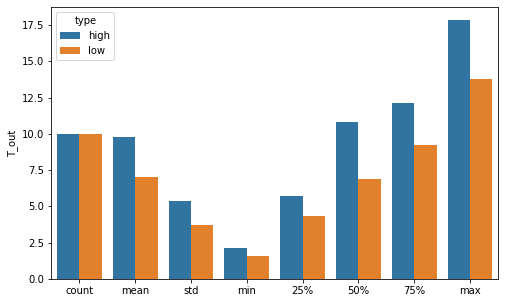

In [29]:
# Visualisasi T_out
plt.figure(figsize=(8,5))
sns.barplot(data=hilo_usage,x=hilo_usage.index, y='T_out', hue='type')

<AxesSubplot:ylabel='RH_out'>

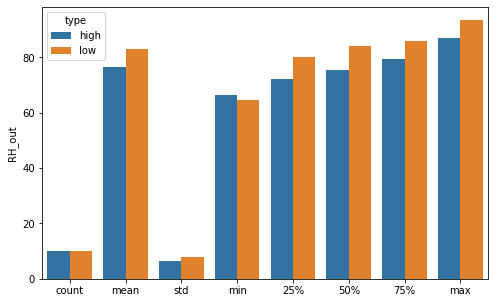

In [30]:
# Visualisasi RH_out
plt.figure(figsize=(8,5))
sns.barplot(data=hilo_usage,x=hilo_usage.index, y='RH_out', hue='type')

#### Bagaimana kalau 25 hari?

In [31]:
# statistik 25 hari Penggunaan appliances terbesar

df_daily.sort_values('Appliances', ascending=False).head(25).describe()

Appliances     lights      T_out  Press_mm_hg     RH_out  Windspeed  \
count   25.000000  25.000000  25.000000    25.000000  25.000000  25.000000   
mean   149.914322   5.820133   8.440568   754.698444  80.884104   4.657762   
std     16.087356   6.287232   4.854691     8.034786   7.376630   2.140364   
min    129.444444   0.347222   0.392708   735.173810  66.406250   1.850694   
25%    136.330275   2.361111   5.243750   749.223264  74.500000   2.875000   
50%    147.361111   3.750000   7.490625   755.208333  80.177083   4.538194   
75%    158.402778   8.194444  11.141667   759.251736  86.420139   5.593750   
max    188.541667  30.000000  17.851042   767.917361  94.718750  10.631944   

       Visibility  Tdewpoint  
count   25.000000  25.000000  
mean    37.555579   5.051024  
std      3.730451   4.280565  
min     33.833333  -2.825000  
25%     35.256944   2.024653  
50%     36.065972   4.934722  
75%     39.329861   7.923264  
max     47.718750  12.850347

In [32]:
# statistik 25 hari Penggunaan appliances terkecil

df_daily.sort_values('Appliances', ascending=True).head(25).describe()

Appliances     lights      T_out  Press_mm_hg     RH_out  Windspeed  \
count   25.000000  25.000000  25.000000    25.000000  25.000000  25.000000   
mean    62.694444   1.525000   8.467361   759.151035  78.901875   3.924722   
std      9.913463   1.586300   4.768195     4.800275   8.065600   1.932086   
min     37.500000   0.000000  -0.497222   750.688889  55.958333   1.784722   
25%     59.583333   0.347222   5.869444   756.535069  74.989583   2.743056   
50%     66.041667   0.694444   7.427083   759.649653  79.638889   3.267361   
75%     70.000000   2.430556  10.580208   763.001389  85.454861   4.517361   
max     71.805556   5.555556  19.372569   768.896528  93.527778   9.347222   

       Visibility  Tdewpoint  
count   25.000000  25.000000  
mean    38.325208   4.632736  
std      3.892359   4.331701  
min     30.729167  -3.704167  
25%     36.083333   2.172222  
50%     38.225694   3.856250  
75%     41.489583   7.846875  
max     46.631944  14.167361

Nilai rata-rata seluruh fitur kecuali Appliances dan lights menjadi tidak jauh berbeda

#### Pada saat suhu udara tinggi atau rendah, bagaimana penggunaan listriknya?

In [33]:
# 10 hari suhu udara tertinggi

df_daily.sort_values('T_out', ascending=False).head(10).describe()

Appliances     lights      T_out  Press_mm_hg     RH_out  Windspeed  \
count   10.000000  10.000000  10.000000    10.000000  10.000000  10.000000   
mean   103.042750   1.487831  17.492736   751.186924  68.804259   2.996142   
std     38.814738   2.019643   1.081315     3.598918  11.759303   0.947421   
min     65.972222   0.208333  15.878472   744.597222  50.468750   1.923611   
25%     72.690972   0.364583  16.731684   748.561024  58.291667   2.535590   
50%     91.111111   0.598879  17.384338   751.718056  73.835531   2.750000   
75%    127.438679   1.423611  18.352083   753.803993  77.223958   3.039931   
max    168.611111   6.597222  19.372569   755.784862  85.454861   4.708333   

       Visibility  Tdewpoint  
count   10.000000  10.000000  
mean    37.626647  10.925432  
std      3.799048   2.518955  
min     34.250000   7.030208  
25%     34.985243   9.169531  
50%     36.312500  11.791394  
75%     39.208333  12.723003  
max     46.596330  14.167361

In [34]:
# 10 hari suhu udara terendah

df_daily.sort_values('T_out', ascending=True).head(10).describe()

Appliances     lights      T_out  Press_mm_hg     RH_out  Windspeed  \
count   10.000000  10.000000  10.000000    10.000000  10.000000  10.000000   
mean    95.909722   3.868056  -0.294965   760.341319  84.440625   2.245139   
std     30.578755   1.832085   1.697673     5.732520   3.561560   1.001170   
min     45.694444   0.694444  -2.937847   749.223264  80.263889   1.000000   
25%     83.385417   2.881944  -1.340712   757.648872  82.511285   1.683160   
50%     92.916667   3.993056   0.131250   760.431076  83.786458   1.987847   
75%    109.322917   5.607639   0.973437   763.379687  85.580729   2.320312   
max    142.708333   5.833333   1.615278   770.546528  91.923611   4.517361   

       Visibility  Tdewpoint  
count   10.000000  10.000000  
mean    42.507292  -2.754375  
std      8.706615   1.927162  
min     30.069444  -5.645139  
25%     36.972222  -3.302604  
50%     41.388889  -3.065104  
75%     47.686632  -1.526215  
max     58.600694   0.370139

Tidak berbeda jauh namun penggunaan lampu lebih tinggi saat suhu udara rendah. Apakah ada kaitannya dengan waktu?

#### Bagaimana total penggunaan listrik dan kondisi cuaca bulanan?

<AxesSubplot:xlabel='Appliances', ylabel='T_out'>

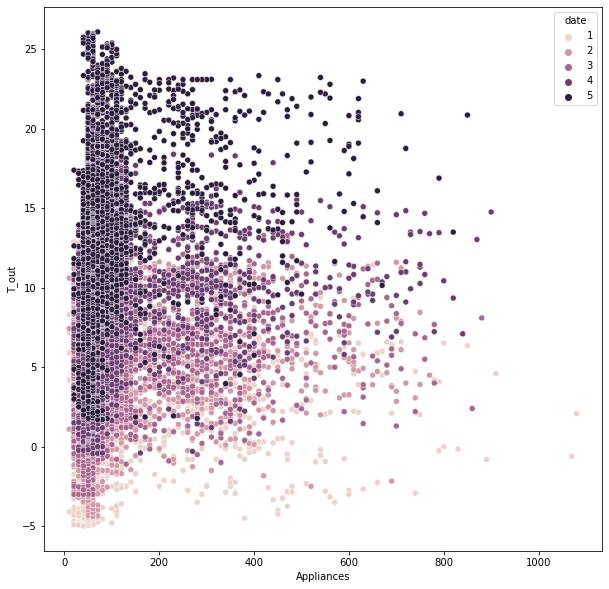

In [35]:
# Visualisasi Appliances vs T_out
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='Appliances', y='T_out', hue=df['date'].dt.month)

Penggunaan listrik yang tinggi lebih banyak ditemukan pada bulan 1

<AxesSubplot:xlabel='Appliances', ylabel='lights'>

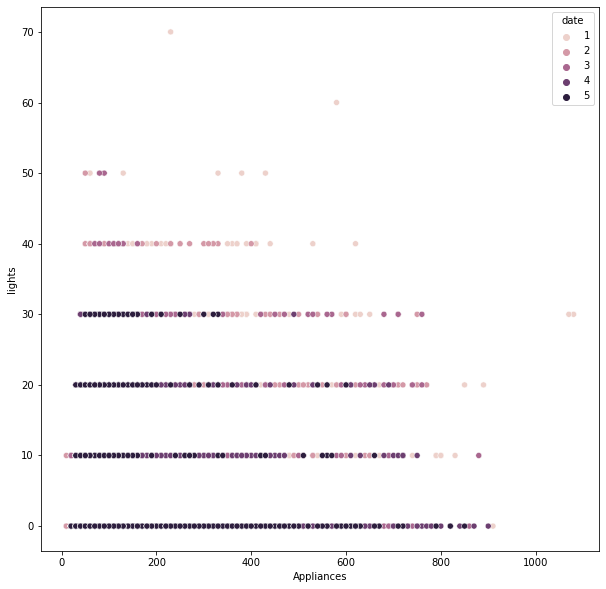

In [36]:
# Visualisasi Appliances vs T_out
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='Appliances', y='lights', hue=df['date'].dt.month)

# 3. Modelling

## Train Test Split

In [37]:
# train_test split

from sklearn.model_selection import train_test_split

X = df.drop(['Appliances', 'date', 'usage_cat'], axis=1).to_numpy() # remove the dates
y = df['Appliances'].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression

# define the model
simple_reg = LinearRegression()

# train the model
simple_reg.fit(X_train, y_train)

LinearRegression()

### Train Data Performance

In [39]:
# prepare prediction result on train data
y_predict_train = simple_reg.predict(X_train)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 97.66166246767743
MAE for training data is 55.83244512316299
MAPE for training data is 0.6571374631609095


### Test Data Performance

In [41]:
# prepare prediction result on test data
y_predict_test = simple_reg.predict(X_test)

In [42]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 103.06309134172248
MAE for testing data is 57.764756561773325
MAPE for testing data is 0.6560570078366003


MAPE untuk training dan testing performance sangat besar, di atas 65%

Model regresi linear tidak dapat digunakan

## Random Forest Model

In [43]:
# model definition

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state = 42)

regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Train Data Performance

In [44]:
# prepare prediction result on train data
y_predict_train = regressor.predict(X_train)

In [45]:
print('RMSE for train data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for train data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for train data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for train data is 27.281371093956245
MAE for train data is 13.629680770205221
MAPE for train data is 0.14764731261125708


Untuk dataset test:
Dari model dasar diperoleh RMSE 27.2, MAE 13.6, dan MAPE 14.7%

Artinya model dapat memprediksi dengan error rata-rata 27.2 Wh atau 14.7% dari nilai seharusnya

### Test Data Performance

In [46]:
# prepare prediction result on test data
y_predict_test = regressor.predict(X_test)

In [47]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 76.8221797018768
MAE for testing data is 37.950114010640995
MAPE for testing data is 0.38725713798142


Untuk dataset test:
Dari model dasar diperoleh RMSE 76.8, MAE 37.9, dan MAPE 38.7%

Artinya model dapat memprediksi dengan error rata-rata 37.9 Wh atau 38.7% dari nilai seharusnya

## K-Nearest Neighbor Model

In [48]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [49]:
# prepare prediction result on train data
y_predict_train = knn_reg.predict(X_train)

In [50]:
print('RMSE for train data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for train data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for train data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for train data is 68.45285059068301
MAE for train data is 33.68786420065873
MAPE for train data is 0.34617444420430354


In [51]:
# prepare prediction result on test data
y_predict_test = regressor.predict(X_test)

In [52]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 76.8221797018768
MAE for testing data is 37.950114010640995
MAPE for testing data is 0.38725713798142


Untuk dataset test:
Dari model dasar diperoleh RMSE 104.6, MAE 54.7, dan MAPE 58.1%

Artinya model dapat memprediksi dengan error rata-rata 54.7 Wh atau 58.1% dari nilai seharusnya

## Tuning Hyperparamter

#### Tuning Random Forest Regression

In [53]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (50,100,200),
    'max_depth':(10,20,30)
}

rf_reg = RandomForestRegressor(random_state = 42)

rf_reg_gridcv = GridSearchCV(rf_reg, parameters, cv=5, scoring='neg_mean_absolute_percentage_error')
rf_reg_gridcv.fit(X_train, y_train)

CPU times: total: 2min 35s
Wall time: 3min 10s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': (10, 20, 30),
                         'n_estimators': (50, 100, 200)},
             scoring='neg_mean_absolute_percentage_error')

In [54]:
# the results
cv_result = pd.DataFrame(rf_reg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
8  {'max_depth': 30, 'n_estimators': 200}        -0.415058                1
7  {'max_depth': 30, 'n_estimators': 100}        -0.417730                2
6   {'max_depth': 30, 'n_estimators': 50}        -0.423228                3
5  {'max_depth': 20, 'n_estimators': 200}        -0.423263                4
4  {'max_depth': 20, 'n_estimators': 100}        -0.425318                5
3   {'max_depth': 20, 'n_estimators': 50}        -0.427542                6
2  {'max_depth': 10, 'n_estimators': 200}        -0.533681                7
1  {'max_depth': 10, 'n_estimators': 100}        -0.534370                8
0   {'max_depth': 10, 'n_estimators': 50}        -0.536176                9

In [55]:
# Using the best parameter (train)
y_predict_train = rf_reg_gridcv.predict(X_train)

In [56]:
print('RMSE for train data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for train data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for train data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for train data is 26.778979438720025
MAE for train data is 13.478770627704288
MAPE for train data is 0.14594093002263023


Untuk dataset train:
Dari model dasar diperoleh RMSE 26.7, MAE 13.5, dan MAPE 14.5%

Artinya model dapat memprediksi dengan error rata-rata 13.5 Wh atau 14.5% dari nilai seharusnya

In [57]:
# Using the best parameter (test)
y_predict_test= rf_reg_gridcv.best_estimator_.predict(X_test)

In [58]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 76.8167561763282
MAE for testing data is 37.83755657645687
MAPE for testing data is 0.38445853778438216


Untuk dataset test:
Dari model dasar diperoleh RMSE 76.8, MAE 37.8, dan MAPE 38.4%

Artinya model dapat memprediksi dengan error rata-rata 37.8 Wh atau 38.4% dari nilai seharusnya

Tidak ada perubahan signifikan setelah dilakukan tuning.

Terdapat indikasi bahwa model mengalami overfit

#### Random Forest Feature Importance

<AxesSubplot:xlabel='0'>

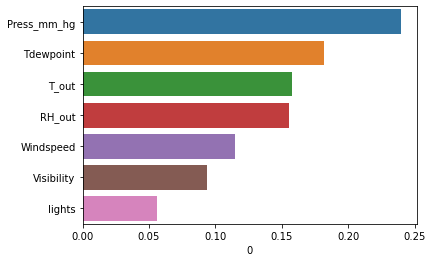

In [59]:
# Calculating feature importance

cols = ['lights', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

feat_imp = pd.DataFrame(rf_reg_gridcv.best_estimator_.feature_importances_, cols)

feat_imp_sorted = feat_imp.sort_values(0,ascending=False)

sns.barplot(x=feat_imp_sorted[0], y=feat_imp_sorted.index)

<AxesSubplot:xlabel='0'>

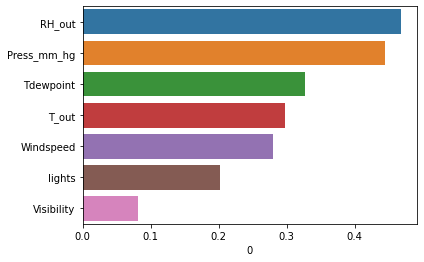

In [60]:
# Calculating permutation importance

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf_reg_gridcv.best_estimator_, X_test, y_test)

cols = ['lights', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

feat_imp = pd.DataFrame(perm_importance.importances_mean, cols)

feat_imp_sorted = feat_imp.sort_values(0,ascending=False)

sns.barplot(x=feat_imp_sorted[0], y=feat_imp_sorted.index)

#### Tuning KNN Regression

In [61]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8,9),
    'weights': ('uniform', 'distance')
}

knn_reg = KNeighborsRegressor()

knn_reg_gridcv = GridSearchCV(knn_reg, parameters, cv=5, scoring='neg_mean_absolute_percentage_error')
knn_reg_gridcv.fit(X_train, y_train)

CPU times: total: 3.02 s
Wall time: 3.6 s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8, 9),
                         'weights': ('uniform', 'distance')},
             scoring='neg_mean_absolute_percentage_error')

In [62]:
# the results
cv_result = pd.DataFrame(knn_reg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  \
1   {'n_neighbors': 2, 'weights': 'distance'}        -0.410780   
3   {'n_neighbors': 3, 'weights': 'distance'}        -0.418414   
0    {'n_neighbors': 2, 'weights': 'uniform'}        -0.421077   
5   {'n_neighbors': 4, 'weights': 'distance'}        -0.427493   
7   {'n_neighbors': 5, 'weights': 'distance'}        -0.434649   
2    {'n_neighbors': 3, 'weights': 'uniform'}        -0.439929   
9   {'n_neighbors': 6, 'weights': 'distance'}        -0.441564   
11  {'n_neighbors': 7, 'weights': 'distance'}        -0.447072   
13  {'n_neighbors': 8, 'weights': 'distance'}        -0.451882   
15  {'n_neighbors': 9, 'weights': 'distance'}        -0.456230   
4    {'n_neighbors': 4, 'weights': 'uniform'}        -0.457760   
6    {'n_neighbors': 5, 'weights': 'uniform'}        -0.471282   
8    {'n_neighbors': 6, 'weights': 'uniform'}        -0.484377   
10   {'n_neighbors': 7, 'weights': 'uniform'}        -0.494175   
12   {'n_neighbors': 8, 'weights': 'uniform'}        -0.502759   
14   {'n_neighbors': 9, 'weights': 'uniform'}        -0.510485   

    rank_test_score  
1                 1  
3                 2  
0                 3  
5                 4  
7                 5  
2                 6  
9                 7  
11                8  
13                9  
15               10  
4                11  
6                12  
8                13  
10               14  
12               15  
14               16

In [63]:
# Using the best parameter (train)
y_predict_train = knn_reg_gridcv.predict(X_train)

In [64]:
print('RMSE for train data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for train data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for train data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for train data is 0.0
MAE for train data is 0.0
MAPE for train data is 0.0


In [65]:
# Using the best parameter (test)
y_predict_test= knn_reg_gridcv.best_estimator_.predict(X_test)

In [66]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 89.49193844123779
MAE for testing data is 41.08081637574965
MAPE for testing data is 0.38955853395849144


Model KNN, meskipun lebih sederhana dari random forest, memiliki performa yang tidak lebih baik dan tetap terindikasi overfitting

# 4. Modelling dengan Data Harian

## Train Test Split

In [67]:
# train_test split

from sklearn.model_selection import train_test_split

X = df_daily.drop(['Appliances'], axis=1).to_numpy() # remove the dates
y = df_daily['Appliances'].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression

# define the model
simple_reg = LinearRegression()

# train the model
simple_reg.fit(X_train, y_train)

LinearRegression()

In [69]:
# prepare prediction result on train data
y_predict_train = simple_reg.predict(X_train)

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 28.558131236497776
MAE for training data is 22.706724972003975
MAPE for training data is 0.24368574320364206


In [71]:
# prepare prediction result on test data
y_predict_test = simple_reg.predict(X_test)

In [72]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 30.82874541416398
MAE for testing data is 25.722463245207376
MAPE for testing data is 0.3008195951649611


In [73]:
# retrieve the coefficients
# show as a nice dataframe

data = df_daily.drop(['Appliances'], axis=1)
model = simple_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

feature  coefficient
0    intercept   390.984178
1       lights     2.412312
2        T_out     0.153840
3  Press_mm_hg    -0.374105
4       RH_out    -0.153479
5    Windspeed     1.801319
6   Visibility    -0.394045
7    Tdewpoint     0.103992

#### Interpretasi:

Setiap peningkatan lights, dengan variabel lainnya tetap, meningkatkan nilai Appliances sebanyak 2.41

## Random Forest Model

In [74]:
# model definition

regressor = RandomForestRegressor(random_state = 42)

regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Train Data Performance

In [75]:
# prepare prediction result on train data
y_predict_train = regressor.predict(X_train)

In [76]:
print('RMSE for train data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for train data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for train data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for train data is 11.187654460183186
MAE for train data is 9.257505444351782
MAPE for train data is 0.09933009544936953


Untuk dataset train:
Dari model dasar diperoleh RMSE 11.18, MAE 9.25, dan MAPE 9.9%

Artinya model dapat memprediksi dengan error rata-rata 9.25 Wh atau 9.9% dari nilai seharusnya

### Test Data Performance

In [77]:
# prepare prediction result on test data
y_predict_test = regressor.predict(X_test)

In [78]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 32.691963349182146
MAE for testing data is 28.283271215596333
MAPE for testing data is 0.3164031956798677


Untuk dataset test:
Dari model dasar diperoleh RMSE 32.7, MAE 28.2, dan MAPE 31.6%

Artinya model dapat memprediksi dengan error rata-rata 28.2 Wh atau 31.6% dari nilai seharusnya

## Tuning Hyperparamter

In [79]:
%%time

parameters = {
    'n_estimators': (50,100,200,500),
    'max_depth':(10,20,30,50)
}

rf_reg = RandomForestRegressor(random_state = 42)

rf_reg_gridcv = GridSearchCV(rf_reg, parameters, cv=5, scoring='neg_mean_absolute_percentage_error')
rf_reg_gridcv.fit(X_train, y_train)

CPU times: total: 10.9 s
Wall time: 13.3 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': (10, 20, 30, 50),
                         'n_estimators': (50, 100, 200, 500)},
             scoring='neg_mean_absolute_percentage_error')

In [80]:
# the results
cv_result = pd.DataFrame(rf_reg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
0    {'max_depth': 10, 'n_estimators': 50}        -0.258525                1
1   {'max_depth': 10, 'n_estimators': 100}        -0.258624                2
4    {'max_depth': 20, 'n_estimators': 50}        -0.259110                3
8    {'max_depth': 30, 'n_estimators': 50}        -0.259110                3
12   {'max_depth': 50, 'n_estimators': 50}        -0.259110                3
5   {'max_depth': 20, 'n_estimators': 100}        -0.259695                6
9   {'max_depth': 30, 'n_estimators': 100}        -0.259695                6
13  {'max_depth': 50, 'n_estimators': 100}        -0.259695                6
3   {'max_depth': 10, 'n_estimators': 500}        -0.260240                9
7   {'max_depth': 20, 'n_estimators': 500}        -0.260464               10
11  {'max_depth': 30, 'n_estimators': 500}        -0.260464               10
15  {'max_depth': 50, 'n_estimators': 500}        -0.260464               10
2   {'max_depth': 10, 'n_estimators': 200}        -0.261401               13
6   {'max_depth': 20, 'n_estimators': 200}        -0.261707               14
10  {'max_depth': 30, 'n_estimators': 200}        -0.261707               14
14  {'max_depth': 50, 'n_estimators': 200}        -0.261707               14

In [81]:
# Using the best parameter (train)
y_predict_train = rf_reg_gridcv.predict(X_train)

In [82]:
print('RMSE for train data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for train data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for train data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for train data is 11.433096342840088
MAE for train data is 9.352114682093
MAPE for train data is 0.10206286197159288


Untuk dataset train:
Dari model dasar diperoleh RMSE 11.4, MAE 9.4, dan MAPE 0.1%

Artinya model dapat memprediksi dengan error rata-rata 11.4 Wh atau 10.2% dari nilai seharusnya

In [83]:
# Using the best parameter (test)
y_predict_test= rf_reg_gridcv.best_estimator_.predict(X_test)

In [84]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 33.23005623348588
MAE for testing data is 28.658050875025364
MAPE for testing data is 0.32263889323601974


Untuk dataset test:
Dari model dasar diperoleh RMSE 33.2, MAE 28.7, dan MAPE 32.2%

Artinya model dapat memprediksi dengan error rata-rata 28.7 Wh atau 32.2% dari nilai seharusnya

Tidak ada perubahan signifikan setelah dilakukan tuning.

Terdapat indikasi bahwa model mengalami overfit

## K-Nearest Neighbor Model

In [85]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [86]:
# prepare prediction result on train data
y_predict_train = knn_reg.predict(X_train)

In [87]:
print('RMSE for train data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for train data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for train data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for train data is 25.29395082726549
MAE for train data is 20.216871698637753
MAPE for train data is 0.21460343138978236


In [88]:
# prepare prediction result on test data
y_predict_test = regressor.predict(X_test)

In [89]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 32.691963349182146
MAE for testing data is 28.283271215596333
MAPE for testing data is 0.3164031956798677


#### Tuning KNN Regression

In [90]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8,9)
}

knn_reg = KNeighborsRegressor()

knn_reg_gridcv = GridSearchCV(knn_reg, parameters, cv=5, scoring='neg_mean_absolute_percentage_error')
knn_reg_gridcv.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 33.5 ms


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8, 9)},
             scoring='neg_mean_absolute_percentage_error')

In [91]:
# the results
cv_result = pd.DataFrame(knn_reg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
3  {'n_neighbors': 5}        -0.279934                1
2  {'n_neighbors': 4}        -0.282186                2
7  {'n_neighbors': 9}        -0.282293                3
4  {'n_neighbors': 6}        -0.283509                4
5  {'n_neighbors': 7}        -0.285253                5
1  {'n_neighbors': 3}        -0.287161                6
6  {'n_neighbors': 8}        -0.288083                7
0  {'n_neighbors': 2}        -0.293746                8

In [92]:
# Using the best parameter (train)
y_predict_train = knn_reg_gridcv.predict(X_train)

In [93]:
print('RMSE for train data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for train data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for train data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for train data is 25.29395082726549
MAE for train data is 20.216871698637753
MAPE for train data is 0.21460343138978236


In [94]:
# Using the best parameter (test)
y_predict_test= knn_reg_gridcv.best_estimator_.predict(X_test)

In [95]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 34.92191110324374
MAE for testing data is 28.61897025629824
MAPE for testing data is 0.33889791637884337
